### Random-Forest

The dataset contains the historical data of temperature for a city taken from meteorological department. It contains the month of the year, day of the month ,day of the week, maximum temperature of the previous two days, prediction of the temperature by a colleague, etc. Write a python program to predict the temperature of the city for the next day using Random Forest.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load the dataset from CSV
df = pd.read_csv("/content/drive/MyDrive/ML SEM VI/temperature.csv")

In [ ]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df)

In [ ]:
# Splitting the dataset into train and test sets
X = df.drop('actual', axis=1)
y = df['actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
# Predicting the temperature for the next day
next_day_features = X_test.iloc[0].values.reshape(1, -1)
next_day_prediction = rf_model.predict(next_day_features)

In [ ]:
print("Predicted temperature for the next day:", next_day_prediction[0])

Predicted temperature for the next day: 70.283


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Predicting temperatures for the test set
y_pred = rf_model.predict(X_test)

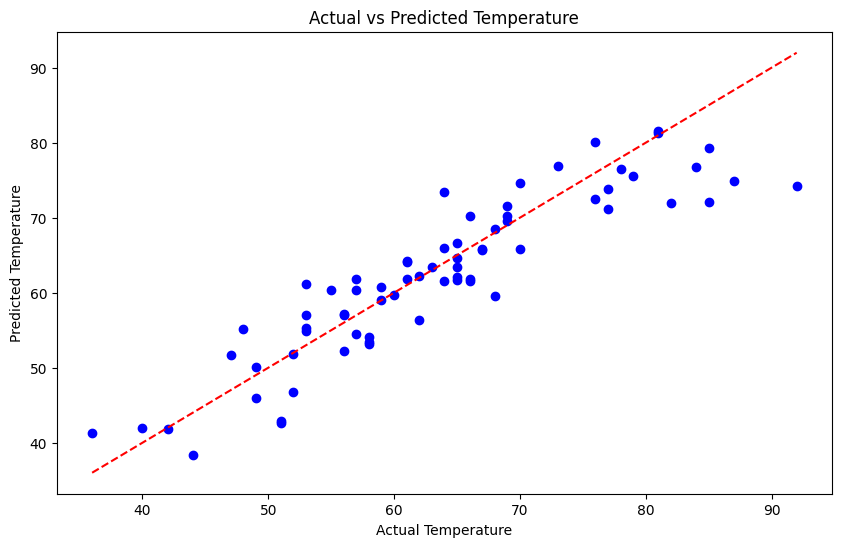

In [ ]:
# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("The mean square error is",mse)

The mean square error is 26.092927399999994


In [ ]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, predictions)
print("Accuracy of the model is",accuracy * 100)

Accuracy of the model is 81.3389091548638
